In [1]:
# importing standard library packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the data file .csv
df = pd.read_csv('/Users/roywong/Desktop/Work_Stuff/PythonPortfolio/10.web_imdb_data/EDA_movies.csv')

In [3]:
df.head(3)

,Title,Ratings,Raters,Directors,Writers,Actors,Country,Language,Date,Budget,...,Animation,Adventure,Crime,Musical,Western,War,Action,Comedy,Year,Month
0,Tenet,7.6,213736.0,Christopher Nolan,Christopher Nolan,"['John David Washington', 'Robert Pattinson', ...",UK,Norwegian,2020-08-27,205000000.0,...,0,0,0,0,0,0,1,0,2020,8
1,Ava,5.4,28393.0,Tate Taylor,Matthew Newton,"['Jessica Chastain', 'John Malkovich', 'Common']",USA,English,2020-09-02,40000000.0,...,0,0,1,0,0,0,1,0,2020,9
2,Love Actually,7.6,425479.0,Richard Curtis,Richard Curtis,"['Hugh Grant', 'Martine McCutcheon', 'Liam Nee...",UK,English,2003-12-26,40000000.0,...,0,0,0,0,0,0,0,1,2003,12


In [4]:
df.shape

(1987, 37)

In [5]:
# checking missing values
df.isnull().sum()

Title                   0
Ratings                 0
Raters                  0
Directors               0
Writers                 0
Actors                  0
Country                 0
Language                0
Date                    0
Budget                  0
Openning Weekend        0
Gross USA               0
cumulative worldwide    0
Studios                 0
Durations               0
Romance                 0
Horror                  0
Music                   0
Fantasy                 0
Mystery                 0
Sci-Fi                  0
Biography               0
Family                  0
Drama                   0
Sport                   0
History                 0
Thriller                0
Animation               0
Adventure               0
Crime                   0
Musical                 0
Western                 0
War                     0
Action                  0
Comedy                  0
Year                    0
Month                   0
dtype: int64

- missing values are all eliminated
- genres are now in binary 

# Model building:

- Linear Regression
- Ridge Regression 
- Lasso Regression
- Random Forest
- Bayesian Ridge

In [6]:
df.columns

Index(['Title', 'Ratings', 'Raters', 'Directors', 'Writers', 'Actors',
       'Country', 'Language', 'Date', 'Budget', 'Openning Weekend',
       'Gross USA', 'cumulative worldwide', 'Studios', 'Durations', 'Romance',
       'Horror', 'Music', 'Fantasy', 'Mystery', 'Sci-Fi', 'Biography',
       'Family', 'Drama', 'Sport', 'History', 'Thriller', 'Animation',
       'Adventure', 'Crime', 'Musical', 'Western', 'War', 'Action', 'Comedy',
       'Year', 'Month'],
      dtype='object')

In [7]:
df_model = df[['Ratings', 'Raters', 
               'Country', 'Language', 'Budget', 
               'Durations', 'Romance', 'Horror', 'Music', 'Fantasy', 
               'Mystery', 'Sci-Fi', 'Biography','Family', 'Drama', 'Sport', 
               'History', 'Thriller', 'Animation','Adventure', 'Crime', 'Musical',
               'Western', 'War', 'Action', 'Comedy','Year', 'Month']]

In [8]:
# get dummy variables
df_dum = pd.get_dummies(df_model)

In [9]:
# train test split
from sklearn.model_selection import train_test_split

X = df_dum.drop('Ratings', axis = 1)
y = df_dum.Ratings.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [10]:
# multiple linear regression
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     21.63
Date:                Thu, 14 Jan 2021   Prob (F-statistic):          4.36e-184
Time:                        12:28:37   Log-Likelihood:                -2100.4
No. Observations:                1987   AIC:                             4335.
Df Residuals:                    1920   BIC:                             4710.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            4.4179      5.289      0.835      0.404      -5.956      14.791
Raters                        2.348e-06   9.36e-08     25.078      0.000    2.16e-06    2.53e-06
Budget                        -3.81e-09   3.45e-10    -11.028      0.000   -4.49e-09   -3.13e-09
Durations                        0.0134      0.001     13.036      0.000       0.011       0.015
Romance                         -0.0416      0.047     -0.890      0.374      -0.133       0.050
Horror                          -0.0065      0.057     -0.115      0.908      -0.118       0.105
Music                           -0.0741      0.100     -0.741      0.459      -0.270       0.122
Fantasy                          0.0117      0.051      0.228      0.820      -0.089       0.112
Mystery                          0.0157      0.053      0.299      0.765      -0.087       0.119
Sci-Fi                           0.0777      0.049      1.584      0.113      -0.019       0.174
Biography                        0.0011      0.066      0.017      0.986      -0.129       0.131
Family                          -0.0255      0.072     -0.351      0.725      -0.168       0.117
Drama                            0.0095      0.040      0.234      0.815      -0.070       0.089
Sport                            0.0094      0.112      0.084      0.933      -0.211       0.230
History                          0.0326      0.090      0.364      0.716      -0.143       0.209
Thriller                        -0.0053      0.044     -0.122      0.903      -0.091       0.080
Animation                        0.0450      0.095      0.473      0.636      -0.142       0.232
Adventure                       -0.0042      0.050     -0.085      0.932      -0.101       0.093
Crime                           -0.0107      0.048     -0.222      0.825      -0.105       0.084
Musical                         -0.0897      0.113     -0.795      0.426      -0.311       0.132
Western                          0.1685      0.144      1.168      0.243      -0.114       0.451
War                              0.0010      0.094      0.011      0.992      -0.183       0.185
Action                          -0.0522      0.045     -1.149      0.251      -0.141       0.037
Comedy                          -0.0344      0.043     -0.802      0.422      -0.118       0.050
Year                             0.0002      0.003      0.069      0.945      -0.005       0.006
Month                           -0.0108      0.005     -2.368      0.018      -0.020      -0.002
Country_Australia                0.1852      0.275      0.675      0.500      -0.353       0.724
Country_Bahamas                  0.3454      0.717      0.482      0.630      -1.061       1.752
Country_Belgium                  0.9642      0.443      2.175      0.030    

In [11]:
# linear Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
reg = lm.fit(X_train, y_train)
reg.score(X_train, y_train)

0.43598790107606755

In [12]:
# Mean Absolute Error
np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-0.5407481180413725

# Lasso Regression

In [13]:
# lasso regression
lm_l = Lasso(alpha=0.012)
lm_l.fit(X_train, y_train)

np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-0.5347048895827061

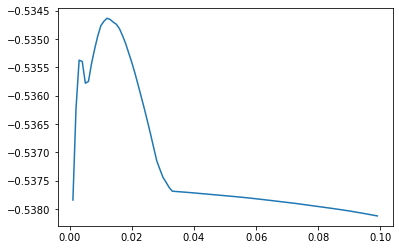

In [14]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/1000)
    lml = Lasso(alpha=(i/1000))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)))


plt.plot(alpha, error)

In [15]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
11,0.012,-0.534636


# Ridge Regression

In [16]:
# Ridge Regressor
lm_ridge = Ridge(alpha = 1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train_scaled, y_train_scaled  = scaler.fit_transform(X_train, y_train)
lm_ridge.fit(X_train, y_train)

np.mean(cross_val_score(lm_ridge, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

/Users/roywong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3446e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/roywong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.96396e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/roywong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.11544e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/roywong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.95135e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


-0.5391552438030495

# Bayesian Ridge Regression

In [17]:
from sklearn.linear_model import BayesianRidge

lm_bayes = BayesianRidge()
lm_bayes.fit(X_train, y_train)


np.mean(cross_val_score(lm_bayes, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-0.5376414168336439

# Random Forest 

In [18]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf, X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-0.4954055569426116

# Model Tuning

In [19]:
# tune models GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 
              'max_features':('auto','sqrt','log2')}


gs = GridSearchCV(rf,parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train,y_train)


gs.best_score_
gs.best_estimator_

RandomForestRegressor(n_estimators=200)

# Test Ensemble

In [20]:
# test ensemble
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_lm_bay = lm_bayes.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error
print('Linear Regression Model MAE: {}'.format(mean_absolute_error(y_test,tpred_lm)))
print('Lasso Regression Model MAE: {}'.format(mean_absolute_error(y_test,tpred_lml)))
print('Bayesian Ridge Regression Model MAE: {}'.format(mean_absolute_error(y_test,tpred_lm_bay)))
print('Random Forest Model MAE: {}'.format(mean_absolute_error(y_test,tpred_rf)))

print('Average Random Foreest and Linear Regression MAE: {}'.format(mean_absolute_error(y_test,
                                                                                        (tpred_lm+tpred_rf)/2)))

Linear Regression Model MAE: 0.5575675405969515
Lasso Regression Model MAE: 0.5401317830070432
Bayesian Ridge Regression Model MAE: 0.5406224214269147
Random Forest Model MAE: 0.5052600502512564
Average Random Foreest and Linear Regression MAE: 0.5145101790917322
